# 1D Dirac Hamiltonian 

We study the 1D Dirac Hamiltonian with sublattice mass, Zeeman term and Rashba spin-orbit coupling
$$
H = v_F\, \tau_x k_x + m\, \tau_z + \Delta_Z\, \sigma_z + \lambda_R \left( \tau_x \sigma_y - \tau_y \sigma_x \right)
$$
where:
$$
\begin{align*}
&v_F \quad \text{is the Fermi velocity} \\
&m \quad \text{is the sublattice (mass) term} \\
&\Delta_Z \quad \text{is the Zeeman splitting} \\
&\lambda_R \quad \text{is the Rashba SOC strength} \\
&\tau_{x,y,z} \quad \text{are Pauli matrices in \textbf{sublattice} space} \\
&\sigma_{x,y,z} \quad \text{are Pauli matrices in \textbf{spin} space} \\
\end{align*}
$$




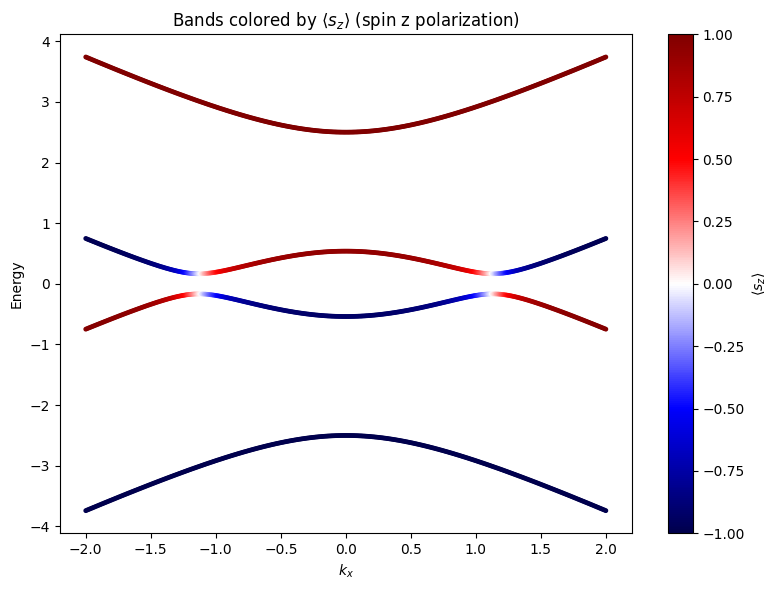

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def build_1d_dirac_rashba_hamiltonian(kx, m, DeltaZ, lambda_R, vF=1.0):
    sigma_x = np.array([[0, 1], [1, 0]])
    sigma_y = np.array([[0, -1j], [1j, 0]])
    sigma_z = np.array([[1, 0], [0, -1]])
    I_sigma = np.eye(2)
    s_x = np.array([[0, 1], [1, 0]])
    s_y = np.array([[0, -1j], [1j, 0]])
    s_z = np.array([[1, 0], [0, -1]])
    I_s = np.eye(2)
    
    kinetic = vF * np.kron(sigma_x * kx, I_s)
    mass = np.kron(sigma_z * m, I_s)
    zeeman = np.kron(I_sigma, s_z * DeltaZ)
    rashba = lambda_R * (np.kron(sigma_x, s_y) - np.kron(sigma_y, s_x))
    H = kinetic + mass + zeeman + rashba
    return H

# Parameters
m = 1.0
DeltaZ = 1.5
lambda_R = 0.1
vF = 1.0
kx_vals = np.linspace(-2, 2, 400)

eigvals = np.zeros((4, len(kx_vals)))
sz_expect = np.zeros((4, len(kx_vals)))

# s_z operator in the full (sublattice x spin) basis
s_z = np.kron(np.eye(2), np.array([[1, 0], [0, -1]]))

for i, kx in enumerate(kx_vals):
    H = build_1d_dirac_rashba_hamiltonian(kx, m, DeltaZ, lambda_R, vF)
    evals, evecs = np.linalg.eigh(H)
    eigvals[:, i] = evals
    # Compute <s_z> for each eigenvector
    for j in range(4):
        psi = evecs[:, j]
        sz_expect[j, i] = np.real(np.vdot(psi, s_z @ psi))

# Plotting
plt.figure(figsize=(8, 6))
for band in range(4):
    plt.scatter(kx_vals, eigvals[band], c=sz_expect[band], 
                cmap='seismic', vmin=-1, vmax=1, s=6, label=f'Band {band+1}' if band==0 else "")
plt.xlabel(r'$k_x$')
plt.ylabel('Energy')
plt.title('Bands colored by $\\langle s_z \\rangle$ (spin z polarization)')
plt.colorbar(label=r'$\langle s_z \rangle$')
plt.tight_layout()
plt.show()
